# Architecture experiment: Subjective and physiological responses to interiors


### Libraries

- [scikit-learn](http://scikit-learn.org/stable/)
- pandas
- matplotlib
- seaborn
- keras

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from pandas.plotting import scatter_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
import seaborn as sns
%matplotlib inline

In [5]:
DATA_FOLDER = './data/' #The data is in the .gitignore in order to not upload it to the GitHub repository

Execute the following line to export from the jupyter notebook(.ipynb) to a .py file (ignore the warnings):

In [6]:
#!jupyter nbconvert --to script Project2-Notebook.ipynb 

For not show the warnings:

In [7]:
import warnings
warnings.filterwarnings(action = 'once')

## Exploratory Data Analysis

### Loading phase

First we load the data into a Pandas data frame (with the Pandas library; to install this package with conda run:
`conda install -c anaconda pandas`):

In [8]:
df_interior_features = pd.read_csv(DATA_FOLDER + 'T_features.csv')
df_labels_and_features = pd.read_csv(DATA_FOLDER + 'table_dataset_GreeceSwitzerland_N265_metrics_mSC5_JPEGtoBMP_Michelson_RMS.csv')

Let's see what is inside `table_dataset_GreeceSwitzerland_N265_metrics_mSC5_JPEGtoBMP_Michelson_RMS.csv`:

In [9]:
df_labels_and_features.head(7)

,ID,Country,Stimulus_SkyType,Stimulus_Context,Gender,Pattern,pleasant,interesting,exciting,calming,complex,bright,view,spacious,contrast_mean_mSC5,contrast_mean_Michelson,contrast_mean_RMS,complexity_mean_JPEGtoBMP
0,1,Greece,clear low,social,Male,P1EL,8,7,6,9,4,6,4,8,11.188207,0.907864,106.363985,0.104734
1,1,Greece,clear low,social,Male,P2EL,8,5,6,8,4,7,3,8,11.941067,0.904661,106.590842,0.122357
2,1,Greece,clear low,social,Male,P3EL,9,8,8,9,6,7,2,8,12.509719,0.905066,106.604335,0.119979
3,1,Greece,clear low,social,Male,P4EL,7,7,7,7,6,6,1,8,12.846015,0.906583,106.929875,0.115287
4,1,Greece,clear low,social,Male,P5EL,8,10,9,7,8,7,5,8,12.211881,0.907546,105.478575,0.118572
5,1,Greece,clear low,social,Male,P6EL,8,8,8,7,9,7,3,8,12.288385,0.912304,106.582042,0.113396
6,2,Greece,clear low,social,Male,P1EL,6,7,8,6,0,7,6,7,11.188207,0.907864,106.363985,0.104734


In [10]:
df_labels_and_features.shape

(1590, 18)

In [11]:
df_labels_and_features.columns

Index(['ID', 'Country', 'Stimulus_SkyType', 'Stimulus_Context', 'Gender',
       'Pattern', 'pleasant', 'interesting', 'exciting', 'calming', 'complex',
       'bright', 'view', 'spacious', 'contrast_mean_mSC5',
       'contrast_mean_Michelson', 'contrast_mean_RMS',
       'complexity_mean_JPEGtoBMP'],
      dtype='object')

The data frame has 1590 rows × 18 columns where we can see the original sample of the experiment (both inputs and outputs (xn,yn)). Each column is explained below:
* 'ID': Identifier of the subject of the experiment (of one person).
* 'Country': Country where the person was living.  2 x countries (Greece –138 participants, Switzerland –127 participants)
* 'Stimulus_SkyType': 3 x sky types (clear sky with high sun angle, clear sky with low sun angle, overcast sky)
* 'Stimulus_Context':  2 x context scenarios (social scenario, work scenario)
* 'Gender': Male or Female
* 'Pattern': 6 x patterns (determine how are the blinds, and so how are the shadows)
* Outputs (yn): 'pleasant', 'interesting', 'exciting', 'calming', 'complex', 'bright', 'view', 'spacious'.
* interior metrics (for describing the interior (the kind of room, light, ...) quantitatively): 'contrast_mean_mSC5', 'contrast_mean_Michelson', 'contrast_mean_RMS', 'complexity_mean_JPEGtoBMP'.

Note: The metrics in this data set are applied to the whole virtual reallity image (in every interior).

Now let's see what is inside `T_features.csv`:

In [12]:
df_interior_features.head()

,filename,Pattern,Context,SkyType,mean_pleasant,median_pleasant,mean_interesting,median_interesting,mean_calming,median_calming,...,contrast_max_mSC5,contrast_mean_Michelson,contrast_mean_Michelson_cube123,contrast_mean_Michelson_cube3,contrast_mean_RMS,contrast_mean_RMS_cube123,contrast_mean_RMS_cube3,complexity_mean_JPEGtoBMP,complexity_cube3_JPEGtoBMP,complexity_cube123_JPEGtoBMP
0,p1_social_clearhigh_sg_largewin_simu,P1EL,social,clearhigh,5.439024,6,4.512195,4,5.731707,6.0,...,82,0.881714,0.822095,0.696552,104.887032,116.926766,138.288359,0.101518,0.158865,0.129797
1,p1_social_clearlow_sg_largewin_simu,P1EL,social,clearlow,5.571429,6,4.510204,5,5.897959,6.0,...,85,0.907864,0.846031,0.750000,106.363985,108.835770,119.479999,0.104734,0.136334,0.127709
2,p1_social_overcast_sg_largewin_simu,P1EL,social,overcast,6.093023,6,4.790698,5,6.651163,7.0,...,49,0.886125,0.829098,0.713287,102.615246,113.078576,133.037937,0.093733,0.134794,0.113091
3,p1_work_clearhigh_sg_largewin_simu,P1EL,work,clearhigh,5.804348,6,5.086957,5,6.152174,6.5,...,116,0.924177,0.874757,0.680272,107.051167,119.883534,142.784796,0.099205,0.159858,0.124465
4,p1_work_clearlow_sg_largewin_simu,P1EL,work,clearlow,5.255814,5,4.418605,5,5.837209,6.0,...,116,0.937813,0.887639,0.728223,108.174380,112.987399,126.132718,0.102264,0.139392,0.122615


In [13]:
df_interior_features.shape

(36, 31)

In [14]:
df_interior_features.columns

Index(['filename', 'Pattern', 'Context', 'SkyType', 'mean_pleasant',
       'median_pleasant', 'mean_interesting', 'median_interesting',
       'mean_calming', 'median_calming', 'mean_exciting', 'median_exciting',
       'mean_complex', 'median_complex', 'mean_bright', 'median_bright',
       'mean_view', 'median_view', 'mean_spacious', 'median_spacious',
       'contrast_mean_mSC5', 'contrast_max_mSC5', 'contrast_mean_Michelson',
       'contrast_mean_Michelson_cube123', 'contrast_mean_Michelson_cube3',
       'contrast_mean_RMS', 'contrast_mean_RMS_cube123',
       'contrast_mean_RMS_cube3', 'complexity_mean_JPEGtoBMP',
       'complexity_cube3_JPEGtoBMP', 'complexity_cube123_JPEGtoBMP'],
      dtype='object')

We have obtained a data frame with 36 rows × 31 columns. This time we see the features of each kind of interior (the kind of room, light, ...)  and several metrics for describing quantitatively the interior situation Each column is explained below:
* 'filename': File where we have the cube map projections associated to every interior. (See in `./Cubemap_Projections/BMP/<filename>` or `./Cubemap_Projections/JPEG/<filename>`). The filenames have the structure "p(pattern_id)_(context)_(SkyType)_sg_largewin_simu".
* 'Pattern': 6 x patterns (determine how are the blinds, and so how are the shadows)
* 'Context': 2 x context scenarios (social scenario, work scenario)
* 'SkyType': 3 x sky types (clear sky with high sun angle, clear sky with low sun angle, overcast sky)
* Means and medians of the outputs (of what people have answer in their respective survey): 'mean_pleasant', 'median_pleasant', 'mean_interesting', 'median_interesting', 'mean_calming', 'median_calming', mean_exciting', 'median_exciting', 'mean_complex', 'median_complex', 'mean_bright', 'median_bright', 'mean_view', 'median_view', 'mean_spacious', 'median_spacious',
* Interior metrics (for describing the interior quantitatively): 'contrast_mean_mSC5', 'contrast_max_mSC5', 'contrast_mean_Michelson', 'contrast_mean_Michelson_cube123', 'contrast_mean_Michelson_cube3', 'contrast_mean_RMS', 'contrast_mean_RMS_cube123','contrast_mean_RMS_cube3', 'complexity_mean_JPEGtoBMP', 'complexity_cube3_JPEGtoBMP', 'complexity_cube123_JPEGtoBMP'

Note: The metrics in this data set are applied not just to the whole virtual reallity image (we have already this data in the other data frame), but to the different parts of the whole image. Cube1 refers to what you see on your left (when you are doing the experiment with VR), cube2 refers to the front and cube3 refers to the right. Cube123 refers to the metric applied to the three subimages. For more details see`./Cubemap_Projections/JPEG/<filename>`.

Having done this previous load and brief analysis, we are going to create the data frame we are interested in work with. Firstly we find that our inputs (or features) could be classified in two types and we are taking both of them: 
* 1- Features of the people (country and gender) who have taken part in the experiment.
* 2- Features of the interior: Now we are taking both categorical and metrics data.

Secondly, the labels (outputs) of our new data frame are the data that comes from every survey (which has been done by each person): 'pleasant', 'interesting', 'exciting', 'calming', 'complex', 'bright', 'view', 'spacious'. We are asked to study first the 'exciting' and the 'calming' labels but we will split the data frame afterwards.

In [15]:
df_labels_and_features.sample()

,ID,Country,Stimulus_SkyType,Stimulus_Context,Gender,Pattern,pleasant,interesting,exciting,calming,complex,bright,view,spacious,contrast_mean_mSC5,contrast_mean_Michelson,contrast_mean_RMS,complexity_mean_JPEGtoBMP
1268,74,Switzerland,clear low,work,Male,P3EL,8,8,8,4,7,8,7,6,12.110578,0.938136,108.475839,0.115164


In [16]:
df_labels_and_features[df_labels_and_features['ID']==21]

,ID,Country,Stimulus_SkyType,Stimulus_Context,Gender,Pattern,pleasant,interesting,exciting,calming,complex,bright,view,spacious,contrast_mean_mSC5,contrast_mean_Michelson,contrast_mean_RMS,complexity_mean_JPEGtoBMP
120,21,Greece,overcast,work,Male,P1EL,4,2,3,5,4,8,3,5,4.916741,0.926055,104.632399,0.092023
121,21,Greece,overcast,work,Male,P2EL,4,2,2,4,4,8,3,5,4.862252,0.926357,105.006511,0.090104
122,21,Greece,overcast,work,Male,P3EL,4,3,3,4,4,8,3,5,5.522844,0.928578,104.993878,0.090165
123,21,Greece,overcast,work,Male,P4EL,4,4,4,4,4,8,3,5,6.326519,0.929018,104.851587,0.093070
124,21,Greece,overcast,work,Male,P5EL,3,3,5,3,5,8,4,5,6.309748,0.929996,105.055261,0.095358
125,21,Greece,overcast,work,Male,P6EL,4,3,3,4,4,8,6,5,6.609126,0.930879,104.874786,0.093971
948,21,Switzerland,overcast,work,Male,P1EL,4,3,3,4,5,7,5,6,4.916741,0.926055,104.632399,0.092023
949,21,Switzerland,overcast,work,Male,P2EL,6,7,7,8,6,5,4,7,4.862252,0.926357,105.006511,0.090104
950,21,Switzerland,overcast,work,Male,P3EL,9,9,5,9,3,6,9,7,5.522844,0.928578,104.993878,0.090165
951,21,Switzerland,overcast,work,Male,P4EL,3,7,3,2,9,6,0,7,6.326519,0.929018,104.851587,0.093070


In [17]:
df_interior_features.head(1)

,filename,Pattern,Context,SkyType,mean_pleasant,median_pleasant,mean_interesting,median_interesting,mean_calming,median_calming,...,contrast_max_mSC5,contrast_mean_Michelson,contrast_mean_Michelson_cube123,contrast_mean_Michelson_cube3,contrast_mean_RMS,contrast_mean_RMS_cube123,contrast_mean_RMS_cube3,complexity_mean_JPEGtoBMP,complexity_cube3_JPEGtoBMP,complexity_cube123_JPEGtoBMP
0,p1_social_clearhigh_sg_largewin_simu,P1EL,social,clearhigh,5.439024,6,4.512195,4,5.731707,6.0,...,82,0.881714,0.822095,0.696552,104.887032,116.926766,138.288359,0.101518,0.158865,0.129797


For doing the join, we check that one of the metrics determine totally the interior (there are not two interiors with the same metric value):

In [18]:
df_interior_features["to_join"]=(1000*df_interior_features["contrast_mean_RMS"]).astype(int) #We cannot do the join on the float
df_labels_and_features["to_join"]=(1000*df_labels_and_features["contrast_mean_RMS"]).astype(int) #so we add another column

df_interior_features.set_index("to_join").index.is_unique

True

In [19]:
df_labels_and_features.columns

Index(['ID', 'Country', 'Stimulus_SkyType', 'Stimulus_Context', 'Gender',
       'Pattern', 'pleasant', 'interesting', 'exciting', 'calming', 'complex',
       'bright', 'view', 'spacious', 'contrast_mean_mSC5',
       'contrast_mean_Michelson', 'contrast_mean_RMS',
       'complexity_mean_JPEGtoBMP', 'to_join'],
      dtype='object')

In [20]:
df_ml_raw = df_interior_features.merge(df_labels_and_features, on = "to_join", how = 'inner', suffixes = ("_a",""))
df_ml_raw.head(1)

,filename,Pattern_a,Context,SkyType,mean_pleasant,median_pleasant,mean_interesting,median_interesting,mean_calming,median_calming,...,exciting,calming,complex,bright,view,spacious,contrast_mean_mSC5,contrast_mean_Michelson,contrast_mean_RMS,complexity_mean_JPEGtoBMP
0,p1_social_clearhigh_sg_largewin_simu,P1EL,social,clearhigh,5.439024,6,4.512195,4,5.731707,6.0,...,5,7,0,7,6,9,5.023496,0.881714,104.887032,0.101518


In [21]:
df_ml_raw.columns

Index(['filename', 'Pattern_a', 'Context', 'SkyType', 'mean_pleasant',
       'median_pleasant', 'mean_interesting', 'median_interesting',
       'mean_calming', 'median_calming', 'mean_exciting', 'median_exciting',
       'mean_complex', 'median_complex', 'mean_bright', 'median_bright',
       'mean_view', 'median_view', 'mean_spacious', 'median_spacious',
       'contrast_mean_mSC5_a', 'contrast_max_mSC5',
       'contrast_mean_Michelson_a', 'contrast_mean_Michelson_cube123',
       'contrast_mean_Michelson_cube3', 'contrast_mean_RMS_a',
       'contrast_mean_RMS_cube123', 'contrast_mean_RMS_cube3',
       'complexity_mean_JPEGtoBMP_a', 'complexity_cube3_JPEGtoBMP',
       'complexity_cube123_JPEGtoBMP', 'to_join', 'ID', 'Country',
       'Stimulus_SkyType', 'Stimulus_Context', 'Gender', 'Pattern', 'pleasant',
       'interesting', 'exciting', 'calming', 'complex', 'bright', 'view',
       'spacious', 'contrast_mean_mSC5', 'contrast_mean_Michelson',
       'contrast_mean_RMS', 'compl

Now we drop the duplicates columns and order the columns in order to have a data frame with the structure X|Y, where X is the matrix of features (each column is a feature) and Y is the matrix with the labels.

In [22]:
df_ml = df_ml_raw[['ID', 'Country', 'Gender', 'Pattern', 'Context', 'SkyType', 'contrast_mean_mSC5', 'contrast_max_mSC5', 
               'contrast_mean_Michelson', 'contrast_mean_Michelson_cube123', 'contrast_mean_Michelson_cube3', 
               'contrast_mean_RMS', 'contrast_mean_RMS_cube123', 'contrast_mean_RMS_cube3', 'complexity_mean_JPEGtoBMP',
               'complexity_cube3_JPEGtoBMP', 'complexity_cube123_JPEGtoBMP', 'pleasant', 'interesting', 'exciting', 'calming', 
               'complex', 'bright', 'view', 'spacious']]




In [23]:
df_ml.head(1)

,ID,Country,Gender,Pattern,Context,SkyType,contrast_mean_mSC5,contrast_max_mSC5,contrast_mean_Michelson,contrast_mean_Michelson_cube123,...,complexity_cube3_JPEGtoBMP,complexity_cube123_JPEGtoBMP,pleasant,interesting,exciting,calming,complex,bright,view,spacious
0,11,Greece,Male,P1EL,social,clearhigh,5.023496,82,0.881714,0.822095,...,0.158865,0.129797,7,5,5,7,0,7,6,9


We can also check and see that there are no missing values. (all instances are non-null)

In [24]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1590 entries, 0 to 1589
Data columns (total 25 columns):
ID                                 1590 non-null int64
Country                            1590 non-null object
Gender                             1590 non-null object
Pattern                            1590 non-null object
Context                            1590 non-null object
SkyType                            1590 non-null object
contrast_mean_mSC5                 1590 non-null float64
contrast_max_mSC5                  1590 non-null int64
contrast_mean_Michelson            1590 non-null float64
contrast_mean_Michelson_cube123    1590 non-null float64
contrast_mean_Michelson_cube3      1590 non-null float64
contrast_mean_RMS                  1590 non-null float64
contrast_mean_RMS_cube123          1590 non-null float64
contrast_mean_RMS_cube3            1590 non-null float64
complexity_mean_JPEGtoBMP          1590 non-null float64
complexity_cube3_JPEGtoBMP         1590 non-nul

and see that all ratings are between 0 and 10:

In [25]:
df_ml[['pleasant', 'interesting', 'exciting', 'calming', 'complex', 'bright',
       'view', 'spacious']].describe().loc[['min','max']]


,pleasant,interesting,exciting,calming,complex,bright,view,spacious
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0


Finally, from this data frame is easy to get X and the labels desired (y) separately. So we get the data frame which contains the matrix of features X and, separately,the labels corresponding to 'exciting' and 'calming' (we were asked to analize this labels firstly):

In [26]:
x_fdata = df_ml.iloc[:,0:16] #fdata -> first data without preprocessing
x_fdata.head(5)

,ID,Country,Gender,Pattern,Context,SkyType,contrast_mean_mSC5,contrast_max_mSC5,contrast_mean_Michelson,contrast_mean_Michelson_cube123,contrast_mean_Michelson_cube3,contrast_mean_RMS,contrast_mean_RMS_cube123,contrast_mean_RMS_cube3,complexity_mean_JPEGtoBMP,complexity_cube3_JPEGtoBMP
0,11,Greece,Male,P1EL,social,clearhigh,5.023496,82,0.881714,0.822095,0.696552,104.887032,116.926766,138.288359,0.101518,0.158865
1,17,Greece,Male,P1EL,social,clearhigh,5.023496,82,0.881714,0.822095,0.696552,104.887032,116.926766,138.288359,0.101518,0.158865
2,29,Greece,Male,P1EL,social,clearhigh,5.023496,82,0.881714,0.822095,0.696552,104.887032,116.926766,138.288359,0.101518,0.158865
3,45,Greece,Male,P1EL,social,clearhigh,5.023496,82,0.881714,0.822095,0.696552,104.887032,116.926766,138.288359,0.101518,0.158865
4,46,Greece,Female,P1EL,social,clearhigh,5.023496,82,0.881714,0.822095,0.696552,104.887032,116.926766,138.288359,0.101518,0.158865


In [27]:
y_data = df_ml["exciting"]
y_data.to_frame().head() #Note that y_data is a Pandas serie

,exciting
0,5
1,4
2,4
3,5
4,5


### Preprocesing Phase

From the dataframe we can see that there are 5 catgorical features:
1. __*Country*__ 
2. __*Gender*__ 
3. __*Pattern*__ 
4. __*Context*__ 
5. __*SkyType*__ 

We can confirm this by checking the type of data for each feature:

In [28]:
x_fdata.dtypes

ID                                   int64
Country                             object
Gender                              object
Pattern                             object
Context                             object
SkyType                             object
contrast_mean_mSC5                 float64
contrast_max_mSC5                    int64
contrast_mean_Michelson            float64
contrast_mean_Michelson_cube123    float64
contrast_mean_Michelson_cube3      float64
contrast_mean_RMS                  float64
contrast_mean_RMS_cube123          float64
contrast_mean_RMS_cube3            float64
complexity_mean_JPEGtoBMP          float64
complexity_cube3_JPEGtoBMP         float64
dtype: object

As we can see the five features mentionned above are the only categorical features (type object).

Let's inspect these features closely:

In [29]:
categorical_features = ['Country','Gender','Pattern','Context', \
                        'SkyType']
for feat in categorical_features:
    print(feat + ':')
    print(x_fdata[feat].value_counts())

Country:
Greece         828
Switzerland    762
Name: Country, dtype: int64
Gender:
Male      816
Female    774
Name: Gender, dtype: int64
Pattern:
P4EL    265
P5EL    265
P1EL    265
P3EL    265
P2EL    265
P6EL    265
Name: Pattern, dtype: int64
Context:
social    798
work      792
Name: Context, dtype: int64
SkyType:
clearlow     552
clearhigh    522
overcast     516
Name: SkyType, dtype: int64


In order to perform dummy variable encoding on the categorical features, we can use the pandas method `pd.get_dummies()`. Also since we need k-1 dummy variables to represent k categories, we can drop the first column for each encoding (`drop_first = True`). We'll store this as a new dataframe `dummy_df`.

In [30]:
dummy_df = pd.get_dummies(x_fdata, columns=categorical_features, drop_first=False)
dummy_df.head(3)

,ID,contrast_mean_mSC5,contrast_max_mSC5,contrast_mean_Michelson,contrast_mean_Michelson_cube123,contrast_mean_Michelson_cube3,contrast_mean_RMS,contrast_mean_RMS_cube123,contrast_mean_RMS_cube3,complexity_mean_JPEGtoBMP,...,Pattern_P2EL,Pattern_P3EL,Pattern_P4EL,Pattern_P5EL,Pattern_P6EL,Context_social,Context_work,SkyType_clearhigh,SkyType_clearlow,SkyType_overcast
0,11,5.023496,82,0.881714,0.822095,0.696552,104.887032,116.926766,138.288359,0.101518,...,0,0,0,0,0,1,0,1,0,0
1,17,5.023496,82,0.881714,0.822095,0.696552,104.887032,116.926766,138.288359,0.101518,...,0,0,0,0,0,1,0,1,0,0
2,29,5.023496,82,0.881714,0.822095,0.696552,104.887032,116.926766,138.288359,0.101518,...,0,0,0,0,0,1,0,1,0,0


We standardize the features in preparation for the training (output excluded, "exciting" column).

In [31]:
x_without_std = dummy_df.copy() #x_without_std is the final standardized data (Just in case you want to use it)
for feat in dummy_df.columns.tolist():
    mean = dummy_df[feat].mean()
    std = dummy_df[feat].std()
    dummy_df[feat] = (dummy_df[feat] - mean)/std

In [32]:
x_data = dummy_df #x_data will be the final standardized data

### Data visualization

In this section we try to visualize the possible relationship between the features and the respose variable

First let's plot the distribution of exciting

count    1590.000000
mean        5.059119
std         2.163320
min         0.000000
25%         4.000000
50%         5.000000
75%         7.000000
max        10.000000
Name: exciting, dtype: float64


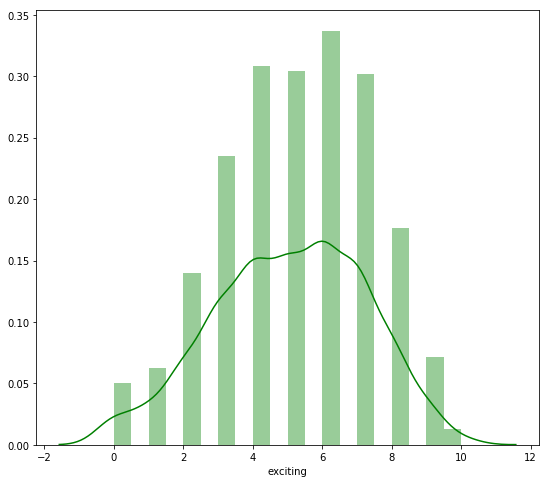

In [60]:
print(y_data.describe())
plt.figure(figsize=(9, 8))
sns.distplot(y_data, color='g');

It almost looks symetric

Now we check the correlation between the **numeric** features and 'exciting'

In [27]:
numeric_data = pd.concat([y_data, x_data], axis=1, sort=False).drop( [ 'Country_Greece', 'Country_Switzerland',
       'Gender_Female', 'Gender_Male', 'Pattern_P1EL', 'Pattern_P2EL',
       'Pattern_P3EL', 'Pattern_P4EL', 'Pattern_P5EL', 'Pattern_P6EL',
       'Context_social', 'Context_work', 'SkyType_clearhigh',
       'SkyType_clearlow', 'SkyType_overcast'], axis = 1)



numeric_data.corr()['exciting']

exciting                           1.000000
contrast_mean_mSC5                 0.097654
contrast_max_mSC5                  0.106577
contrast_mean_Michelson           -0.004917
contrast_mean_Michelson_cube123    0.000960
contrast_mean_Michelson_cube3      0.162255
contrast_mean_RMS                  0.008236
contrast_mean_RMS_cube123         -0.051177
contrast_mean_RMS_cube3           -0.063757
complexity_mean_JPEGtoBMP          0.091284
complexity_cube3_JPEGtoBMP         0.122468
complexity_cube123_JPEGtoBMP       0.118641
Name: exciting, dtype: float64

unfortunately there are no strongly correlated features (with respect to 'exciting').
But correlation only measures linear relationship. we might get more info by plotting the data.

#### plots

We visualize the relations between "exciting"(response variable) and the features

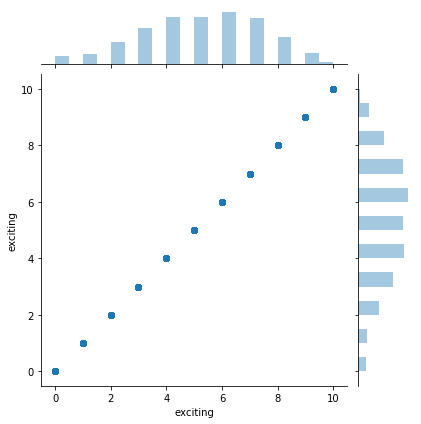

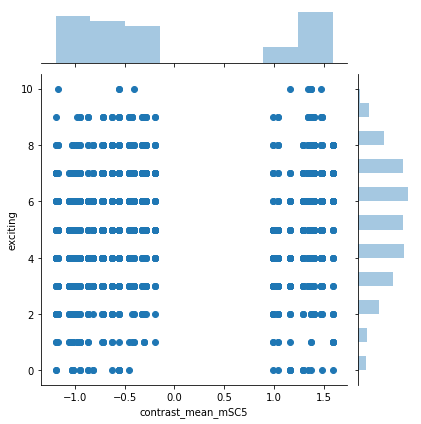

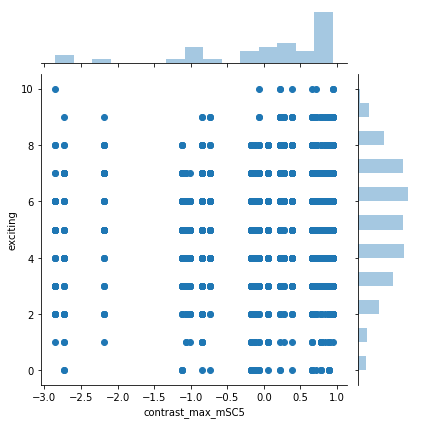

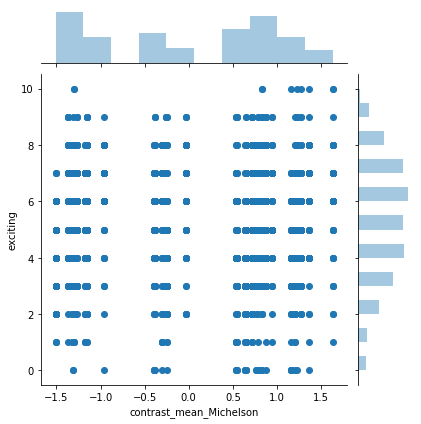

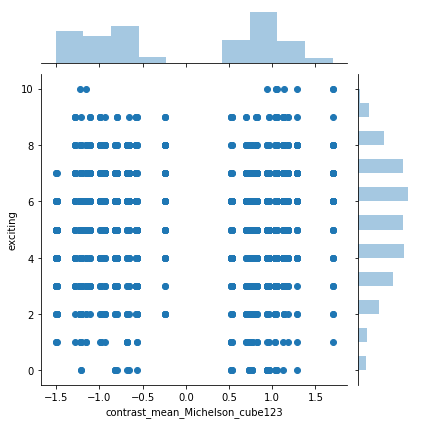

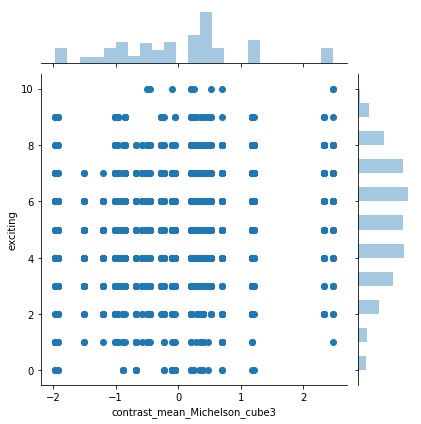

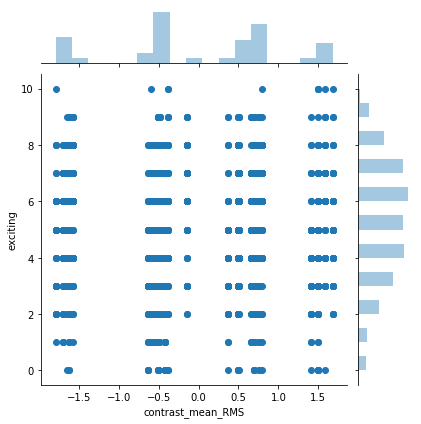

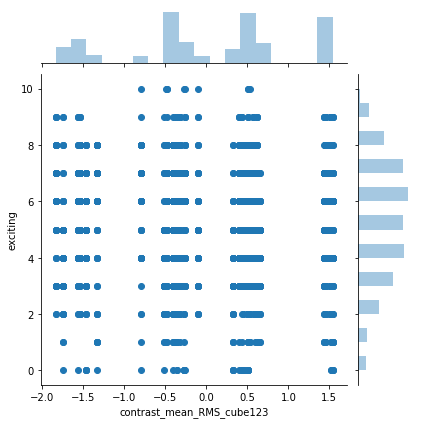

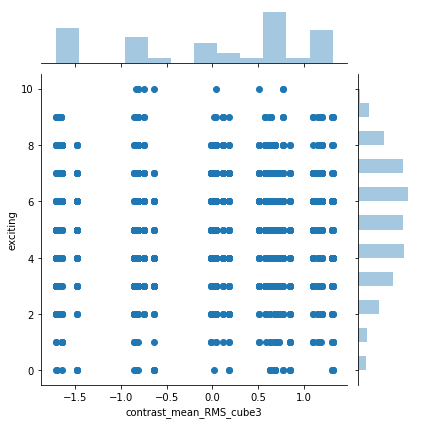

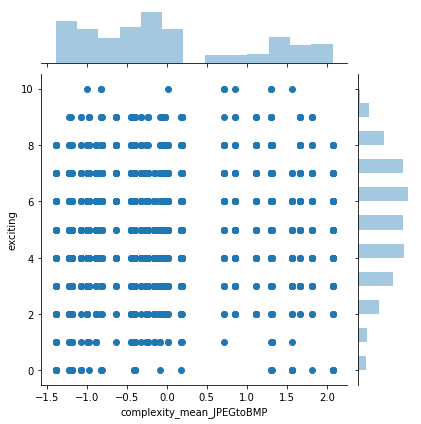

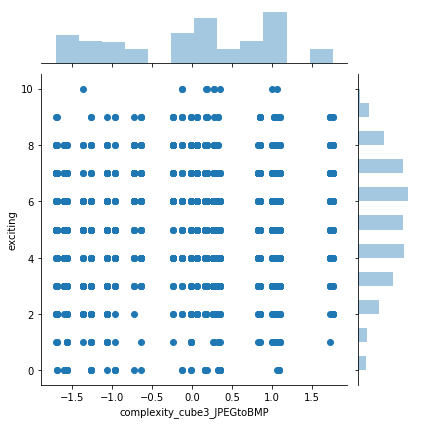

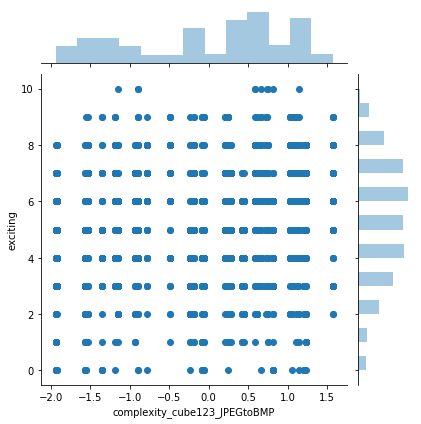

In [62]:
for feature in numeric_data.columns:
    sns.jointplot( numeric_data[feature], numeric_data['exciting'], kind ="scatter")

The scatter plot obviously fails to give a good visualization since the points are overlapping.
So we turn to density plots. 

#### hex plot

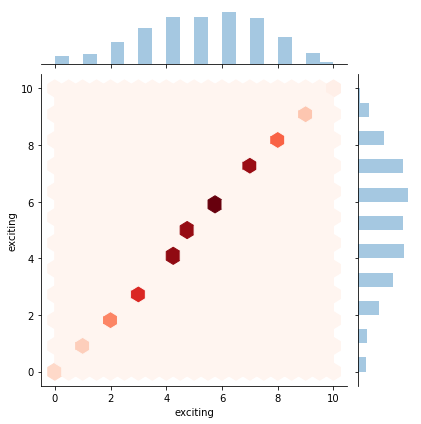

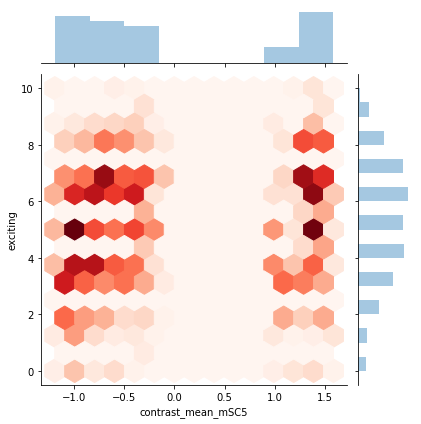

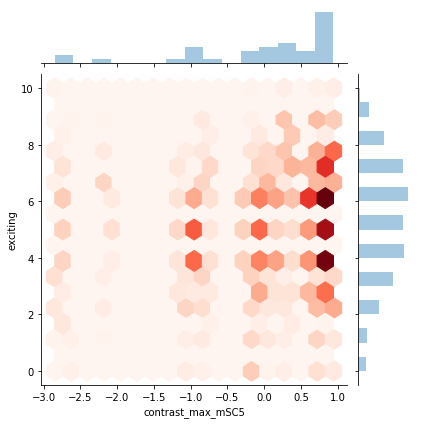

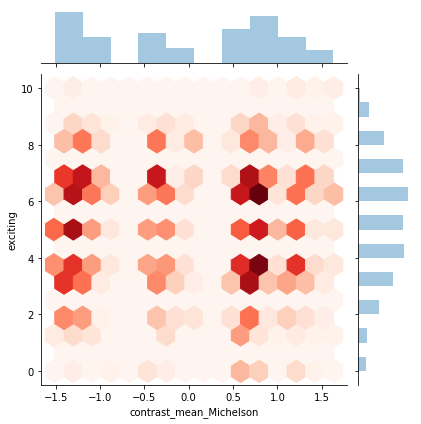

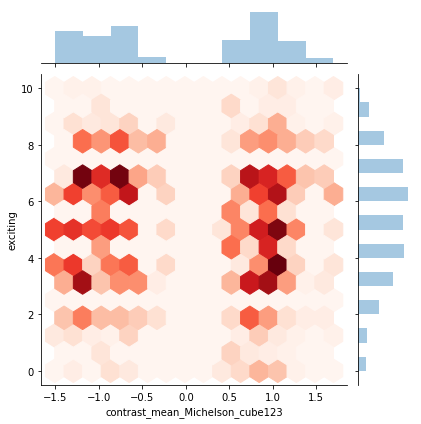

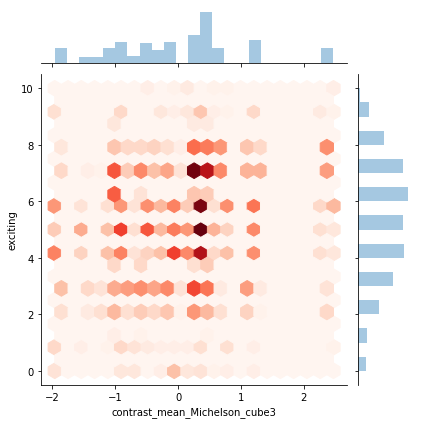

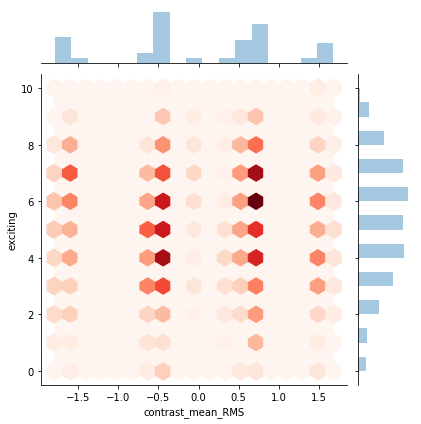

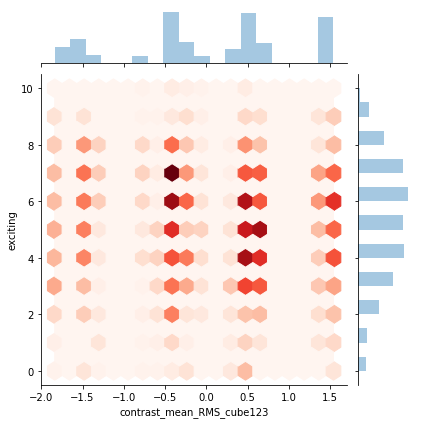

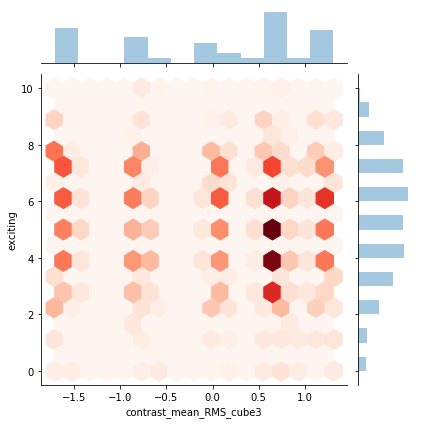

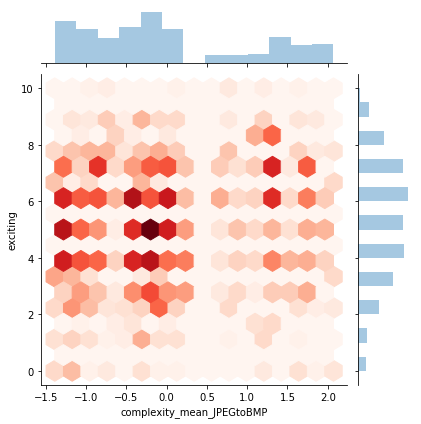

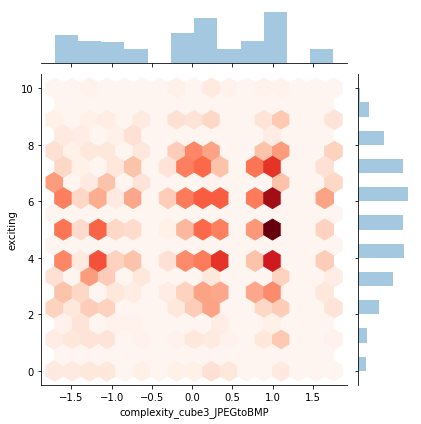

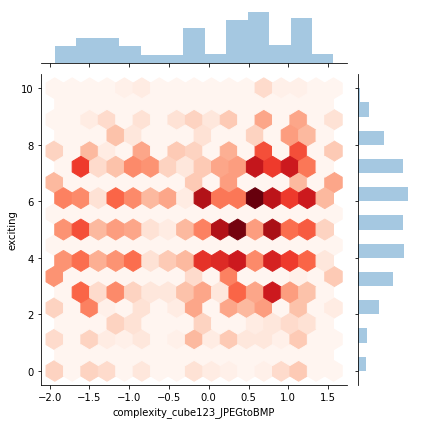

In [61]:
for feature in numeric_data.columns:
    sns.jointplot( numeric_data[feature], numeric_data['exciting'], kind = "hex", cmap="Reds")

#### kernel density plot

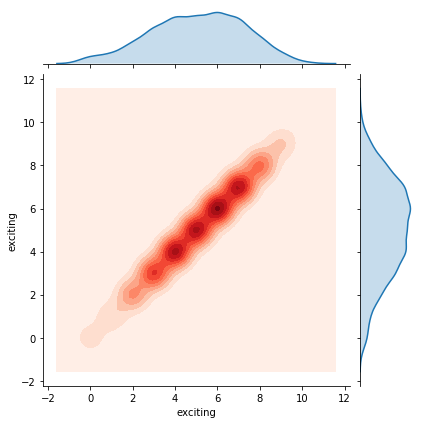

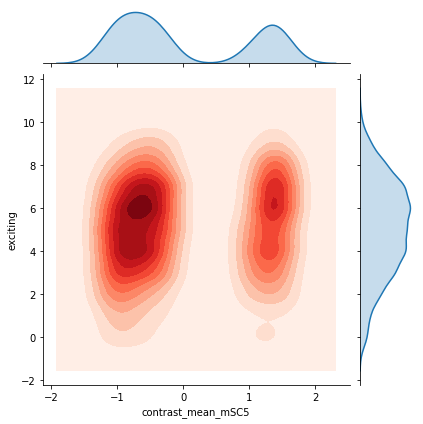

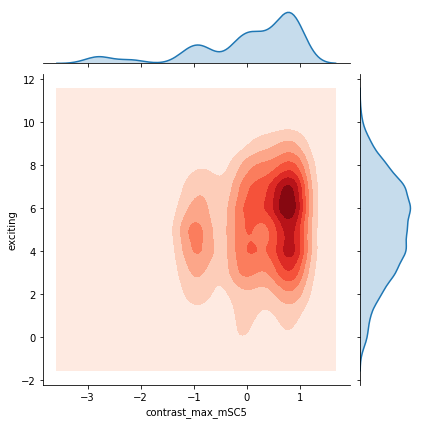

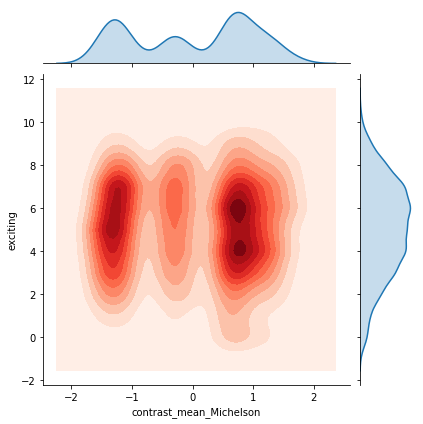

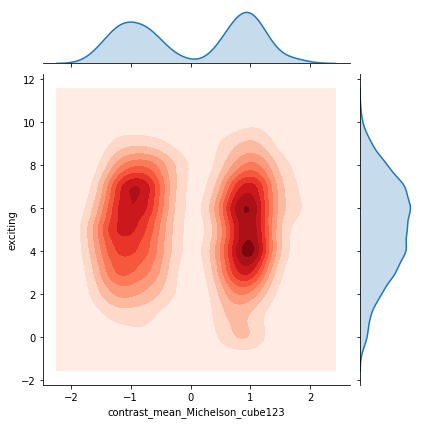

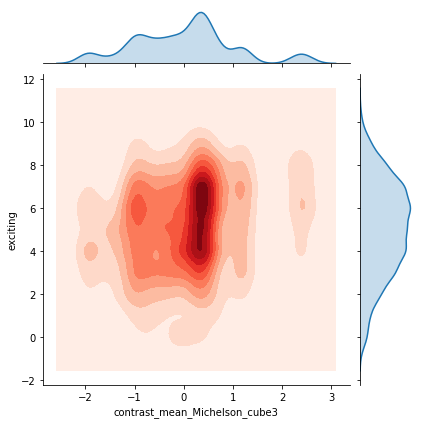

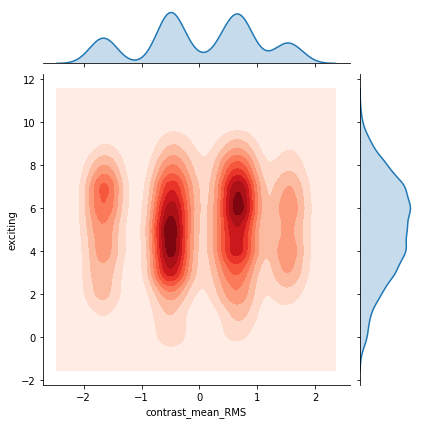

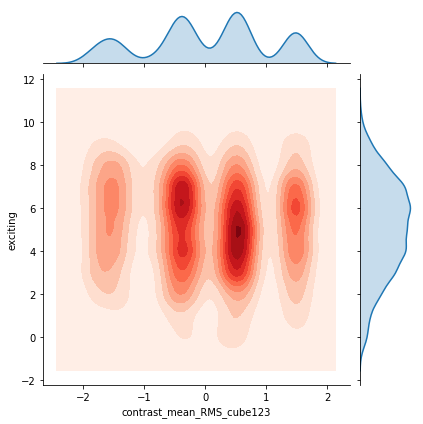

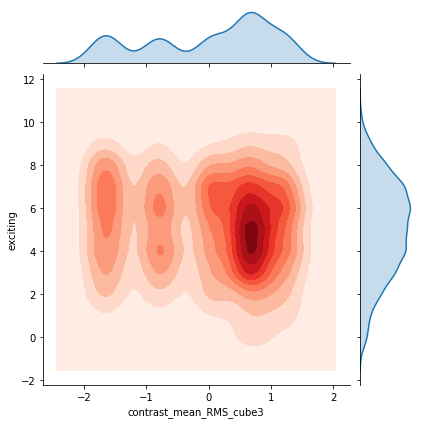

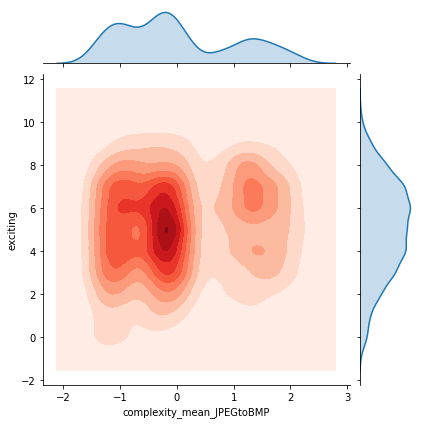

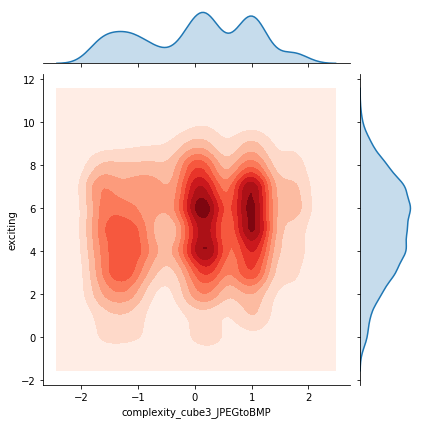

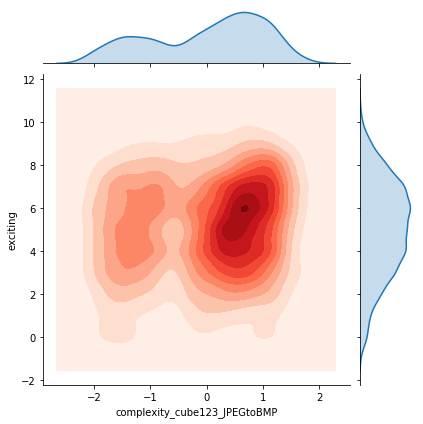

In [63]:
for feature in numeric_data.columns:
    sns.jointplot( numeric_data[feature], numeric_data.exciting, kind = "kdeplot", cmap="Reds", shade=True)

As the spread of data is mostly vertical there is still no obvious relationship bewteen the numeric 
variables and 'exciting'. 

we can also demonstrate the linear regression line estimate for each feature.

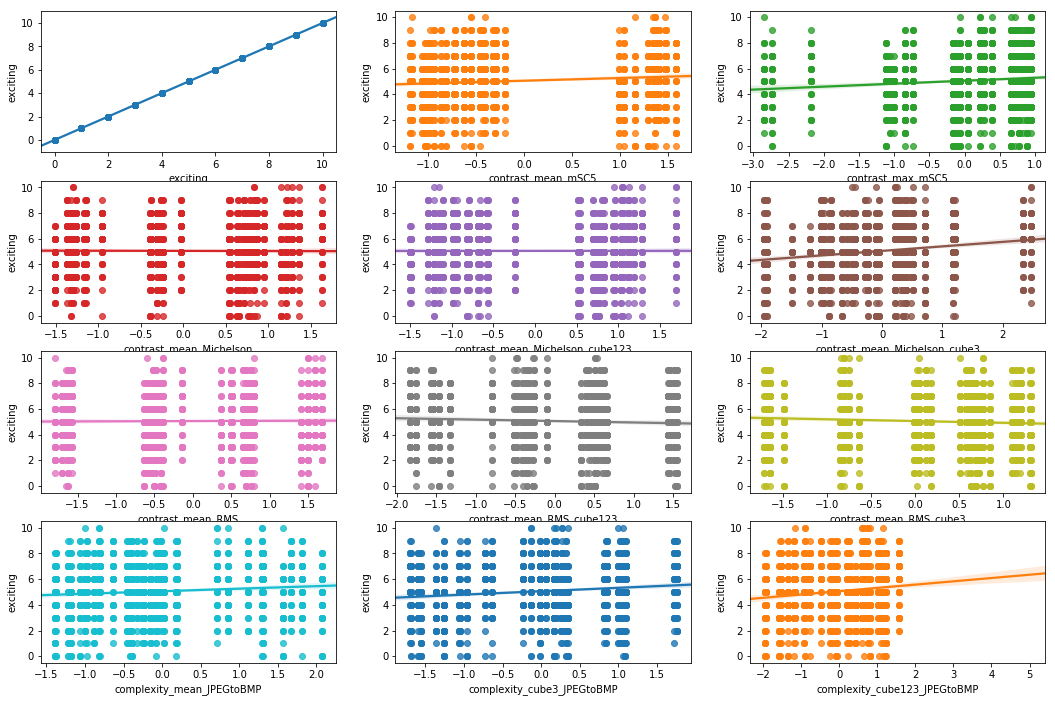

In [64]:
fig, ax = plt.subplots(round(len(numeric_data.columns) / 3), 3, figsize = (18, 12))

for i, ax in enumerate(fig.axes):
        sns.regplot(x=numeric_data.columns[i],y='exciting', data=numeric_data, ax=ax)

Now lets plot box plots for categorical features to see the relashionship between them and exciting

In [32]:
# we need the categorical variables in their originaL(non dummy) form
categ_data = x_fdata[categorical_features]



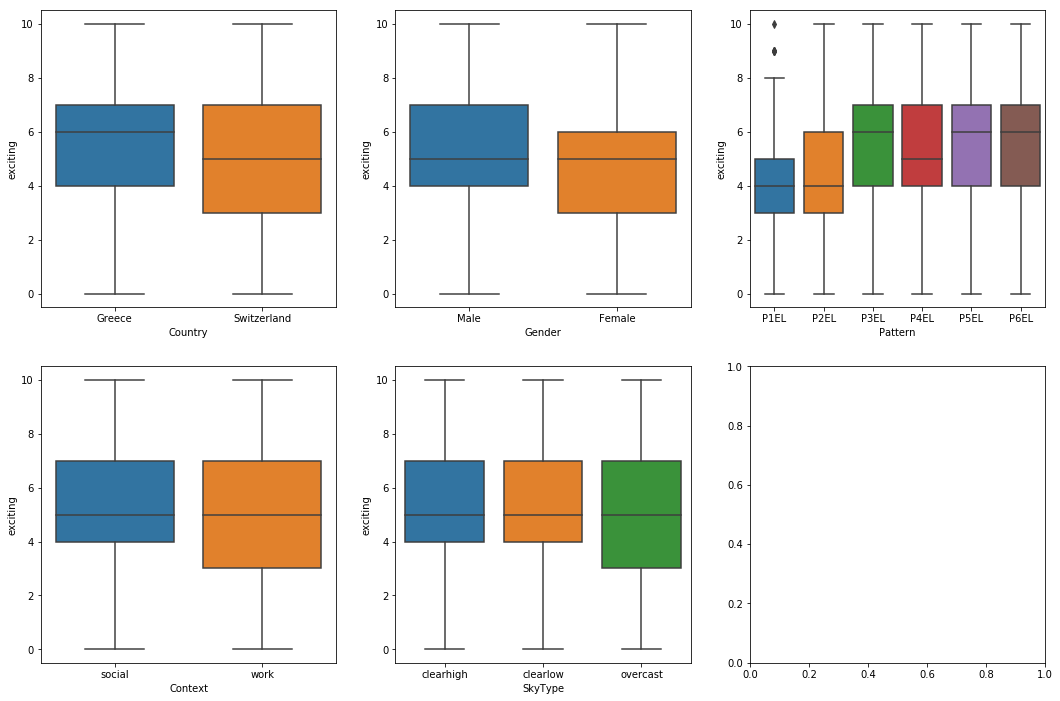

In [33]:
fig, ax = plt.subplots(round(len(categ_data.columns) / 3), 3, figsize = (18, 12))

for i, ax in enumerate(fig.axes):
        if (i < len(categ_data.columns)):
            sns.boxplot(x=categ_data.iloc[:,i], y=y_data, ax=ax)

we can also look at the distributions of categorical variabels

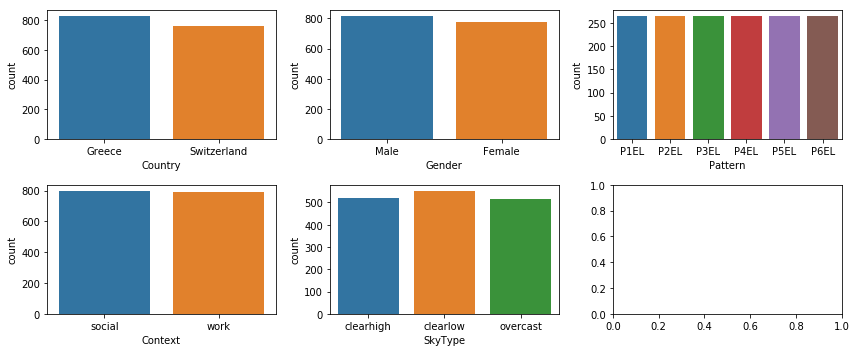

In [34]:
fig, axes = plt.subplots(round(len(categ_data.columns) / 3), 3, figsize=(12, 5))

for i, ax in enumerate(fig.axes):
    if i < len(categ_data.columns):
        sns.countplot(x=categ_data.columns[i], data=categ_data, ax=ax)

fig.tight_layout()

we see that all categories almost have a unifrom distribution. so all of them have the possibility of helping us predict the outcome.

Now lets take a look at the correlation between the **numeric** features

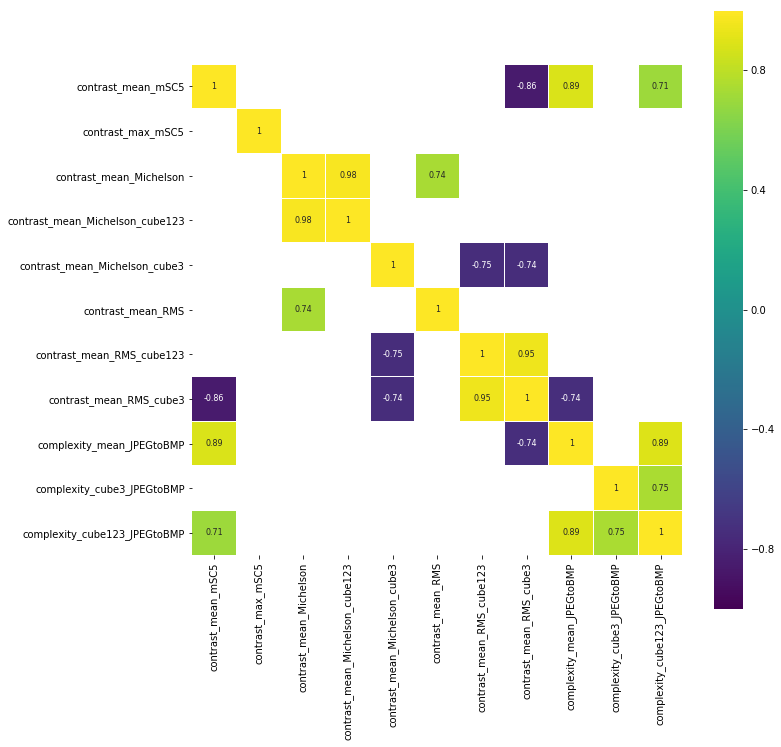

In [35]:
# remove the output variable
corr = numeric_data.drop('exciting', axis=1).corr() 

plt.figure(figsize=(11, 11))

sns.heatmap(corr[(corr >= 0.7) | (corr <= -0.7)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

This tells us that a lot of our measures are highly correlated. 
So if one of them is not useful there might be no reason to use the other one either. 
And maybe we can also reduce our features.

#### Splitting the data

In order to split the data into the two sets (training and test), first we need to rejoin the y_data and the x_data. Then we can use the sample method (`pd.sample()`) which  randomly samples from the dataframe according to a given ratio (0.8 for train in this case). The remaining part of the data will be the test set.

In [36]:
#In order to split the data, we join then again:
data = pd.concat([y_data, x_data], axis=1, sort=False)
data.head(1)

,exciting,contrast_mean_mSC5,contrast_max_mSC5,contrast_mean_Michelson,contrast_mean_Michelson_cube123,contrast_mean_Michelson_cube3,contrast_mean_RMS,contrast_mean_RMS_cube123,contrast_mean_RMS_cube3,complexity_mean_JPEGtoBMP,...,Pattern_P2EL,Pattern_P3EL,Pattern_P4EL,Pattern_P5EL,Pattern_P6EL,Context_social,Context_work,SkyType_clearhigh,SkyType_clearlow,SkyType_overcast
0,5,-0.978351,-1.009075,-1.509758,-1.489519,-1.191899,-0.483861,0.647511,0.718682,-0.163829,...,-0.447073,-0.447073,-0.447073,-0.447073,-0.447073,0.99592,-0.99592,1.429927,-0.729011,-0.692925


In [37]:
train_df = data.sample(frac=0.8,replace=False)
test_df = data.drop(train_df.index.tolist(),axis=0)

In [38]:
train_df.head(3)

,exciting,contrast_mean_mSC5,contrast_max_mSC5,contrast_mean_Michelson,contrast_mean_Michelson_cube123,contrast_mean_Michelson_cube3,contrast_mean_RMS,contrast_mean_RMS_cube123,contrast_mean_RMS_cube3,complexity_mean_JPEGtoBMP,...,Pattern_P2EL,Pattern_P3EL,Pattern_P4EL,Pattern_P5EL,Pattern_P6EL,Context_social,Context_work,SkyType_clearhigh,SkyType_clearlow,SkyType_overcast
934,4,-0.301951,0.775111,0.718995,0.823114,-0.964388,0.659160,1.428632,1.101525,-0.236033,...,-0.447073,-0.447073,2.235365,-0.447073,-0.447073,-1.003465,1.003465,1.429927,-0.729011,-0.692925
1206,6,-0.327021,0.719355,0.714865,0.806375,-1.009271,0.756900,1.505475,1.196983,-0.064544,...,-0.447073,-0.447073,-0.447073,2.235365,-0.447073,-1.003465,1.003465,1.429927,-0.729011,-0.692925
634,7,-0.976701,-2.179946,-1.152225,-0.938750,0.351786,-1.620338,-0.381854,0.039807,-1.199089,...,-0.447073,2.235365,-0.447073,-0.447073,-0.447073,0.995920,-0.995920,-0.698897,-0.729011,1.442250


In [39]:
test_df.head(3)

,exciting,contrast_mean_mSC5,contrast_max_mSC5,contrast_mean_Michelson,contrast_mean_Michelson_cube123,contrast_mean_Michelson_cube3,contrast_mean_RMS,contrast_mean_RMS_cube123,contrast_mean_RMS_cube3,complexity_mean_JPEGtoBMP,...,Pattern_P2EL,Pattern_P3EL,Pattern_P4EL,Pattern_P5EL,Pattern_P6EL,Context_social,Context_work,SkyType_clearhigh,SkyType_clearlow,SkyType_overcast
3,5,-0.978351,-1.009075,-1.509758,-1.489519,-1.191899,-0.483861,0.647511,0.718682,-0.163829,...,-0.447073,-0.447073,-0.447073,-0.447073,-0.447073,0.99592,-0.99592,1.429927,-0.729011,-0.692925
20,3,-0.978351,-1.009075,-1.509758,-1.489519,-1.191899,-0.483861,0.647511,0.718682,-0.163829,...,-0.447073,-0.447073,-0.447073,-0.447073,-0.447073,0.99592,-0.99592,1.429927,-0.729011,-0.692925
23,5,-0.978351,-1.009075,-1.509758,-1.489519,-1.191899,-0.483861,0.647511,0.718682,-0.163829,...,-0.447073,-0.447073,-0.447073,-0.447073,-0.447073,0.99592,-0.99592,1.429927,-0.729011,-0.692925


Quick check of the validity of the split by making sure that the size of the train plus the size of the test equals the size of the dummy:

In [40]:
print(train_df.shape[0] + test_df.shape[0] == dummy_df.shape[0])

True


Double check the mean of the features

In [41]:
#dummy_df.mean()

The means aren't exactly 0 but they are small enough for us to approximate them to 0.

Now for the standart deviation

In [42]:
#dummy_df.std()

Hence our standardized features and our labels are ready to go.

In [43]:
x_train = train_df.iloc[1:-1]
y_train = train_df.iloc[0:1]
x_test = train_df.iloc[1:-1]
y_test = train_df.iloc[0:1]
#x_data and y_data are the preprocessed data without splitting. Maybe we can use them considering that we have very few data

## Exploring different approachs

Having done that, we can start trying differents methods for obtaining predictions about the excitation/calm of a person who do the experiment.

## Linear Regression 

In [44]:
from sklearn import linear_model

In [45]:
reg = LinearRegression()
reg.fit(x_data, y_data)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [46]:
reg.coef_

array([-1.33566385e+00, -1.31710750e-01, -4.45189379e-01,  2.26656311e+00,
       -5.97572882e-01, -7.19254313e-01,  2.59919412e+00, -3.13967966e+00,
        6.45478601e-01, -3.87560728e-01, -1.42693979e-01,  4.17839251e+11,
        4.17839251e+11, -6.77069244e+11, -6.77069244e+11, -2.56183960e+12,
       -2.56183960e+12, -2.56183960e+12, -2.56183960e+12, -2.56183960e+12,
       -2.56183960e+12,  2.20233014e+10,  2.20233014e+10, -8.03610470e+12,
       -8.14691011e+12, -8.01219850e+12])

In [47]:
reg.score(x_data, y_data)

0.11591543627538692

according to the docs score is close to 0 when the model predicts a constant close to the expected value.

Lets also calculate accuracy since our problem can also be seen as classification

In [48]:
def compute_accuracy(model, x_data, y_true):
    
    # predict and round to closest digit
    preds = model.predict(x_data)
    preds = np.rint(preds)
    # round less than 0 and more than 10 to themselves
    preds[preds<0] = 0
    preds[preds>10] = 10
    
    accurate = len(preds[preds == y_true])
    return accurate/len(preds)

print(compute_accuracy(reg, x_data, y_data))

0.19056603773584907


This is a very low accuracy. Let's try polynomial features as well.

In [49]:
from sklearn.preprocessing import PolynomialFeatures


In [50]:
for i in range(1,5):
    poly = PolynomialFeatures(degree=i)
    poly_x = poly.fit_transform(x_data)

    reg = LinearRegression()
    reg.fit(poly_x, y_data)
    
    print("for degree=%d"%i)

    accr = compute_accuracy(reg, poly_x, y_data)
    print("accuracy = %f"%(accr))
    
    print("score = %f \n" %(reg.score(poly_x, y_data)) )


for degree=1
accuracy = 0.191824
score = 0.115963 

for degree=2
accuracy = 0.185535
score = 0.099584 

for degree=3
accuracy = 0.186792
score = 0.136928 

for degree=4
accuracy = 0.177358
score = 0.133283 



as we can see the accuracy is not satesfactory 

## Matrix Factorization and recommender systems

First let's make the ratings matrix ratings. in this matrix each row represents a person and each coluimn a type of room. The cells are filled with the value of exciting (the rating people gave the room).

We go back and use our raw data frame to include the ID column as well.
In this way ID and Country combined give us a uniqe index for each person.

In [33]:
df_people = df_ml_raw[['ID', 'Country', 'Pattern', 'Context', 'SkyType', 'exciting']]

In [36]:
df_people[df_people['ID']==3]

,ID,Country,Pattern,Context,SkyType,exciting
179,3,Greece,P1EL,work,clearlow,4
202,3,Switzerland,P1EL,work,clearlow,5
444,3,Greece,P2EL,work,clearlow,0
467,3,Switzerland,P2EL,work,clearlow,6
709,3,Greece,P3EL,work,clearlow,6
732,3,Switzerland,P3EL,work,clearlow,7
974,3,Greece,P4EL,work,clearlow,2
997,3,Switzerland,P4EL,work,clearlow,6
1239,3,Greece,P5EL,work,clearlow,6
1262,3,Switzerland,P5EL,work,clearlow,8


Now we make a pivot table out of the data. each row identified by 'ID' and 'Country' and each columnn identified by the room specifications ('Pattern', 'Context', 'SkyType'). 

In [3]:
#df_pivot_table = pd.pivot_table(df_people, values='exciting', index=['ID', 'Country'], columns=['Pattern', 'Context', 'SkyType'], aggfunc=np.mean)

In [2]:
#df_pivot_table.sample(4)

We are going to use the surprise library for recommender systems.

(can be downloaded from here: https://surprise.readthedocs.io/en/stable/index.html)

In [1]:
from surprise import NormalPredictor
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import cross_validate
from surprise import NMF

To load data into the format of he library:
The columns of the data frame must correspond to user id, item id and ratings (in that order). 

First we concatenate the ID and Country to get the final uniqe ID of each person.

In [57]:
# cast the integer ID columnn to string as well
people_ID = df_people['ID'].astype(str).str.cat(df_people['Country'], sep='_')

#people_ID[people_ID == '11_Greece']



We also concatenate pattern, context and skytype to get the IDs for rooms

In [58]:
room_ID = df_people['Pattern'].str.cat(df_people['Context'], sep='_').str.cat(df_people['SkyType'], sep='_')

#room_ID[room_ID=='P1EL_social_clearhigh']

In [59]:
final_df =pd.DataFrame(df_people.exciting)

final_df['people_ID'] = people_ID
final_df['room_ID'] = room_ID

#The columns of the data frame must correspond to user id, item id and ratings (in that order). 
final_df = final_df[['people_ID', 'room_ID', 'exciting']]

In [60]:
final_df.head()

,people_ID,room_ID,exciting
0,11_Greece,P1EL_social_clearhigh,5
1,17_Greece,P1EL_social_clearhigh,4
2,29_Greece,P1EL_social_clearhigh,4
3,45_Greece,P1EL_social_clearhigh,5
4,46_Greece,P1EL_social_clearhigh,5


Now we are ready to Use the library. 
First we tell the reader the scale of the rating.
Then we load the data.

In [62]:
reader = Reader(rating_scale=(0, 10))

surprise_data = Dataset.load_from_df(final_df, reader)

Now we use the Non negative matrix factorization algorithm.

We can tune the parameters using the GridSearchCV.

In [80]:
from surprise.model_selection import GridSearchCV

param_grid = {'n_factors':[15, 20, 30, 40, 50], 'n_epochs': [50, 100]}

algo = NMF

gs = GridSearchCV(algo, param_grid, measures=['rmse', 'mae'], cv=3)

gs.fit(surprise_data)

# best RMSE score
print(gs.best_score['rmse'])



# combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])



1.8748353949813452
{'n_factors': 30, 'n_epochs': 50}


In [78]:
pd.DataFrame(gs.cv_results)[['mean_test_rmse', 'param_n_factors', 'param_n_epochs' ]]

,mean_test_rmse,param_n_factors,param_n_epochs
0,2.161512,15,50
1,2.053809,15,100
2,1.985672,20,50
3,1.972411,20,100
4,1.895902,30,50
5,1.944261,30,100
6,1.908423,40,50
7,1.916505,40,100
8,2.003821,50,50
9,1.879361,50,100


Now we use the features we have caculated using Matrix factorization and the features we previously had to perform a linear regression on the data.

First we train on the whole data set. 

In [83]:
# Retrieve the trainset.
trainset = surprise_data.build_full_trainset()

# Build an algorithm, and train it.
algo = NMF(n_factors=50, n_epochs=100)
algo.fit(trainset)

Now we have all the features in the algo.qi.
for each type of room we have 50 features.


In [100]:
room_features = pd.DataFrame(algo.qi)
room_features.shape

(36, 50)

Concatenate the ids of each room to it's row.

In [111]:
r_id = []
for i in range(0,36):
    r_id.append(trainset.to_raw_iid(i))
room_features['r_id'] = r_id
room_features.head(2)

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,r_id
0,0.171881,0.108712,0.509899,0.743840,0.145821,0.692598,0.150698,0.543750,0.295778,0.086851,...,0.354364,0.543231,0.536268,0.632278,0.020084,0.464589,0.377248,0.256704,0.040233,P1EL_social_clearhigh
1,0.180432,0.338845,0.053876,0.316927,0.011716,0.371769,0.203542,0.115626,0.028381,0.460366,...,0.350254,0.887976,0.142294,0.157754,0.482255,0.153031,0.623493,0.258007,0.122402,P1EL_social_clearlow


We will join the data frame df_people based on room_ID and people_ID to get the final table.

In [113]:
#temp = df_people.merge(room_features, on = "r_id", how = 'inner', suffixes = ("_a",""))
#temp.head(1)

## Random Forest

In [65]:
from sklearn.ensemble import RandomForestClassifier

RandomForestClassifier(n_estimators=’warn’, criterion=’gini’, max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None)

Firstly, we do grid search on the number of estimators "n_estimators" and the max depth of the trees "max_depth". We decide to use the accuracy as a criteria for comparing the quality of the diferents models (created by differents "n_estimators" and "max_depth"). So, we compute a data frame with the accuracy for every pair (n_estimators, max_depth) explorated.

In [52]:
n_estimators_range=range(1,100, 5)
max_depth_range= range(1,100, 5)

In [53]:
performance_results = pd.DataFrame(columns=['n_estimators', 'max_depth','accuracy', 'mean_error_scorer'])

index = 0
for i in n_estimators_range:
    for j in max_depth_range:
        forestC = RandomForestClassifier(n_estimators=i, max_depth=j)
        accuracy = cross_val_score(forestC, x_data, y_data, cv = 5, scoring='accuracy').mean()
        mean_error_scorer = cross_val_score(forestC, x_data, y_data, cv = 5, scoring='neg_mean_absolute_error').mean()
        
        performance_results.loc[index] = [i, j, accuracy, mean_error_scorer]  
        index = index + 1

performance_results.head()

,n_estimators,max_depth,accuracy,mean_error_scorer
0,1.0,1.0,0.149124,-2.062918
1,1.0,6.0,0.074718,-2.784947
2,1.0,11.0,0.043383,-2.880666
3,1.0,16.0,0.049022,-3.009720
4,1.0,21.0,0.060919,-3.023457


In [54]:
performance_results.sort_values(by = "accuracy", ascending=False).head(2)

,n_estimators,max_depth,accuracy,mean_error_scorer
0,1.0,1.0,0.149124,-2.062918
20,6.0,1.0,0.128339,-2.164843


In [55]:
performance_results.sort_values(by = "mean_error_scorer", ascending=False).head(3)

,n_estimators,max_depth,accuracy,mean_error_scorer
0,1.0,1.0,0.149124,-2.062918
20,6.0,1.0,0.128339,-2.164843
80,21.0,1.0,0.085025,-2.199780


## Decision Trees

In [56]:
from sklearn import tree

depths_DTR = np.arange(1,15,1); # deepness of the tree
y_DTR = np.zeros((len(depths_DTR), len(y_data)));
mse_DTR = np.zeros(len(depths_DTR));
mse_DTR_cross = np.zeros(len(depths_DTR));

h=0
while(h<len(depths_DTR)):
    DTR = tree.DecisionTreeRegressor(criterion='mse', splitter='best', max_depth=depths_DTR[h]) # min_weight_fraction_leaf?
    DTR = DTR.fit(x_data, y_data)

    #Using everything
    y_DTR[h, :] = DTR.predict(x_data)
    mse_DTR[h] = sum((y_DTR[h, :]-y_data.values)**2)/(len(y_data))
    
    #Using everything with cross validation
    mse_DTR_cross[h] = cross_val_score(DTR, x_data, y_data, cv = 10, scoring='neg_mean_squared_error').mean()
    
    h=h+1

print(mse_DTR)
print(mse_DTR_cross)


[4.52109685 4.40683502 4.27086049 4.16748554 4.10296211 4.01672979
 3.94624527 3.90091159 3.84930367 3.82138326 3.8056197  3.8055114
 3.8055114  3.8055114 ]
[-4.85789737 -4.68428757 -4.72712799 -4.6557173  -4.70079688 -4.63400796
 -4.66170311 -4.80429073 -4.79991168 -4.79173453 -4.76529341 -4.74990241
 -4.79724942 -4.78774367]


## DENSE NEURAL NETWORKS

In [57]:
# Use conda install -c conda-forge keras; conda install -c anaconda keras
from keras.models import Sequential
from keras import optimizers
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
np.random.seed(7)

embed_dim = 128
lstm_out = 196
max_features = len(x_data.values[1, :])

def rnn_model():
    #Create Model: interpreted as a sequence of layers https://keras.io/models/model/
    model = Sequential() 
    model.add(Embedding(max_features, embed_dim, input_length=len(x_data.values[0, :])))
    model.add(SpatialDropout1D(0.4))
    model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2)) # randomnly discard 0.2 for each node?
    model.add(Dense(1, activation='softmax'))
    
    #Compile Model
    model.compile(loss='mean_squared_error', optimizer='adam', metrics = ['accuracy']) # loss: categorical_crossentropy (possible?? have to vectorize "exiciting"?)  ;adam: efficient gradient descent
    return(model)

model = rnn_model()
model.summary
print(model.summary())
model.fit(x_data, y_data, epochs=15, batch_size=32)
    
    

ModuleNotFoundError: No module named 'keras'